<a href="https://colab.research.google.com/github/dangeunii/AI_code/blob/main/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SGDClassifier

In [ ]:
## 데이터 준비하기
import pandas as pd

flower = pd.read_csv('IRIS.csv')
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
## input 데이터 세트를 numpy로 변환, 타겟 데이터 추출
flower_input = flower[['sepal_length','sepal_width','petal_length','petal_width']]
flower_target = flower['species'].to_numpy()

print(flower_target)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [ ]:
from pandas.core.common import random_state
## 훈련세트와 테스트세트로 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    flower_input, flower_target, random_state =42)

In [ ]:
## 훈련 및 테스트 데이터세트를 표준점수로 변환
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
## 확룰적경사하강법을 제공하는 대표적인 분류용 클래스인 SGDClassifier
## SGDClassifier의 loss(손실함수)-log(이진분류), max_iter(에포크)이용
## warning 발생, 훈련횟수 부족으로 인한 경고, score도 높지 않음
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log',max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9464285714285714
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
## SGD로 한 에포크씩 수행
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8928571428571429
0.9736842105263158


In [ ]:
## 최적의 에프크횟수를 확인
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
## partial_fit() 300번 수행
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes = classes)

  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))
  print(train_score)

[0.8839285714285714]
[0.8839285714285714, 0.875]
[0.8839285714285714, 0.875, 0.8928571428571429]
[0.8839285714285714, 0.875, 0.8928571428571429, 0.9017857142857143]
[0.8839285714285714, 0.875, 0.8928571428571429, 0.9017857142857143, 0.9017857142857143]
[0.8839285714285714, 0.875, 0.8928571428571429, 0.9017857142857143, 0.9017857142857143, 0.9107142857142857]
[0.8839285714285714, 0.875, 0.8928571428571429, 0.9017857142857143, 0.9017857142857143, 0.9107142857142857, 0.875]
[0.8839285714285714, 0.875, 0.8928571428571429, 0.9017857142857143, 0.9017857142857143, 0.9107142857142857, 0.875, 0.9017857142857143]
[0.8839285714285714, 0.875, 0.8928571428571429, 0.9017857142857143, 0.9017857142857143, 0.9107142857142857, 0.875, 0.9017857142857143, 0.9107142857142857]
[0.8839285714285714, 0.875, 0.8928571428571429, 0.9017857142857143, 0.9017857142857143, 0.9107142857142857, 0.875, 0.9017857142857143, 0.9107142857142857, 0.8839285714285714]
[0.8839285714285714, 0.875, 0.8928571428571429, 0.901785714

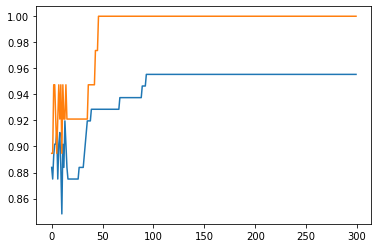

In [ ]:
## 횟수 별로 score 값 출력
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [ ]:
## 에포크횟수가 50인 지점이 최적이라서 SGDClassifier() 모델 생성 및 훈련 수행
## 높은 score 값 출력
sc = SGDClassifier(loss = 'log', max_iter = 50, tol=None, random_state =42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9285714285714286
0.9736842105263158
